# Hate Speech and Offensive Language Dataset - Preprocessing

## NLP Workflow

- Lower casing
- Tokenization
- Punctuation removal
- Stopwords removal
- Stemming
- Lemmatization

In [24]:
dataset = "Hate Speech and Offensive Language Dataset"

In [25]:
import warnings 
warnings.filterwarnings('ignore')

In [26]:
import pandas as pd

In [27]:
data = pd.read_csv(f'../Datasets/Raw/{dataset}/data.csv')

In [28]:
data.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
18392,18801,3,0,3,0,1,RT @___MICHIGANMADE: Only the basic bitches pu...
1712,1747,3,1,2,0,1,&#8220;@candacevon: Niggas talk more then bitc...
2109,2152,3,0,2,1,1,' This Niggah Kevin Hart couldn't sit down lma...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4577,4713,3,0,2,1,1,@RottenStench \nTanks a lot dare mr. Pubes. I ...


In [29]:
data.shape

(24783, 7)

In [30]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [31]:
data.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [32]:
data.nunique()

Unnamed: 0            24783
count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

In [33]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [34]:
data['TEXT'] = None

In [35]:
from Preprocessor import preprocess

In [36]:
field = "tweet"

In [37]:
for i in range(len(data[field])):
    data['TEXT'][i] = preprocess(data[field][i])

In [38]:
data = data.drop(columns=['count','hate_speech','offensive_language','neither','tweet'])

In [39]:
data.sample(5)

,class,TEXT
15539,1,rt hugmakeem avoid commit hoe loyal
17786,1,rt tip ifshecantsuckthedickright slap forehead...
2567,1,beattyjustin kyoppcoalit bitch gon na woman
16806,1,rt jr today day bitch let turn tf hiagokouri z...
19275,1,rt itsdesha hickey hurt see peopl alway hoe


In [40]:
data.rename(columns = {'class':'CLASS'}, inplace = True)

In [41]:
data.to_csv(f'../Datasets/Preprocessed/{dataset}/data.csv')

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

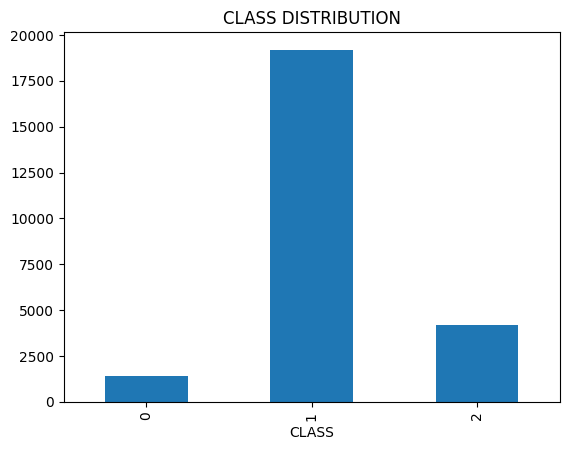

In [43]:
data.groupby('CLASS')['CLASS'].count().plot.bar()
plt.title('CLASS DISTRIBUTION')
plt.show()

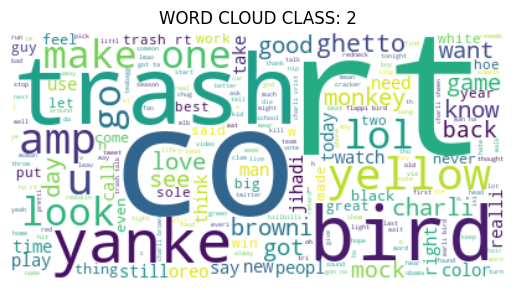

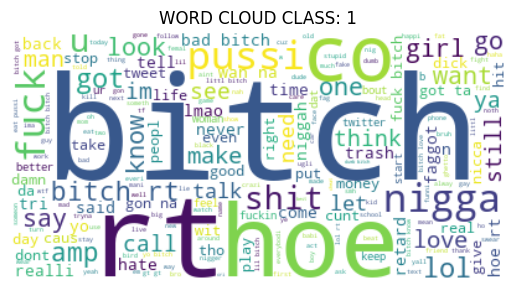

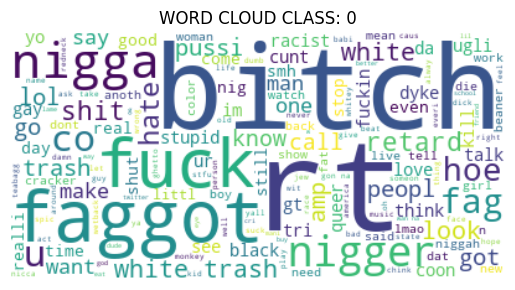

In [48]:
for value in data['CLASS'].unique():
    text = ' '.join(x for x in data[data['CLASS'] == value]['TEXT'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'WORD CLOUD CLASS: {value}')
    plt.show()